In [ ]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
#load the dataset
df = pd.read_excel('new dataset1.xlsx')


In [ ]:
#Display the first few rows of the dataset
print(df.head())


   Player ID  Position  Front Goals  Penalty Strokes  Penalty Corners  \
0       1658         1            5                0                0   
1       5681         3            4                1                4   
2       1435         1            3                2                2   
3       4439         3            1                2                0   
4       1153         1            3                2                1   

   Green Cards  Yellow Cards  Red Cards  Goal Time  Card Issue Time  \
0            1             1          1         68               28   
1            0             0          1         27               12   
2            0             1          0         51               32   
3            1             1          0         28               65   
4            2             1          0         54               47   

   Skill Accuracy  Performance  Score  
0              68            58.83087  
1              78            67.21478  
2             

In [ ]:
#Get summary statistics
print(df.describe())


         Player ID   Position  Front Goals  Penalty Strokes  Penalty Corners  \
count   799.000000  799.00000   799.000000       799.000000       799.000000   
mean   5385.390488    1.95995     3.042553         1.466834         2.501877   
std    2578.811909    0.82316     1.405571         1.123273         1.715968   
min    1020.000000    1.00000     1.000000         0.000000         0.000000   
25%    3172.000000    1.00000     2.000000         0.000000         1.000000   
50%    5338.000000    2.00000     3.000000         1.000000         3.000000   
75%    7626.500000    3.00000     4.000000         2.000000         4.000000   
max    9977.000000    3.00000     5.000000         3.000000         5.000000   

       Green Cards  Yellow Cards   Red Cards   Goal Time  Card Issue Time  \
count   799.000000    799.000000  799.000000  799.000000       799.000000   
mean      0.978723      0.525657    0.486859   30.032541        30.544431   
std       0.821575      0.499654    0.500140   1

Model Building

In [ ]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import svm
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:

X = df.drop(columns=['Performance  Score', 'Player ID','Position'])  # Features (omit 'Player ID' if it's included)
y = df['Performance  Score']  # Target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the resulting datasets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (639, 9)
X_test shape: (160, 9)
y_train shape: (639,)
y_test shape: (160,)


Random Forest Regressor Model

Random Forest Regressor MAE: 0.49
Random Forest Regressor MSE: 0.37


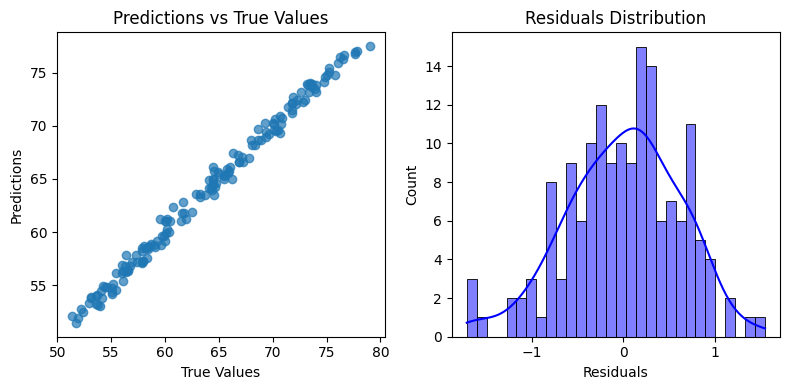

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Create and train a Random Forest Regressor model
RFmodel = RandomForestRegressor()
RFmodel.fit(X_train, y_train)

# Make predictions on the test set
y_predRF = RFmodel.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_predRF)
mse = mean_squared_error(y_test, y_predRF)
r2 = r2_score(y_test, y_predRF)

print(f'Random Forest Regressor MAE: {mae:.2f}')
print(f'Random Forest Regressor MSE: {mse:.2f}')


# Create the plots
plt.figure(figsize=(8, 4))

# Plot 1: Predictions vs True Values (Scatter Plot)
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
plt.scatter(y_test, y_predRF, alpha=0.7)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Predictions vs True Values')

# Plot 2: Residuals Distribution Plot
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
residuals = y_test - y_predRF
sns.histplot(residuals, kde=True, bins=30, color='blue')  # Using seaborn for a nice histogram with KDE
plt.xlabel('Residuals')
plt.title('Residuals Distribution')

plt.tight_layout()
plt.show()




Grsdient Boosting Regression Model

Gradient Boosting Regressor MAE: 0.25
Gradient Boosting Regressor MSE: 0.10
Gradient Boosting Regressor R²: 1.00


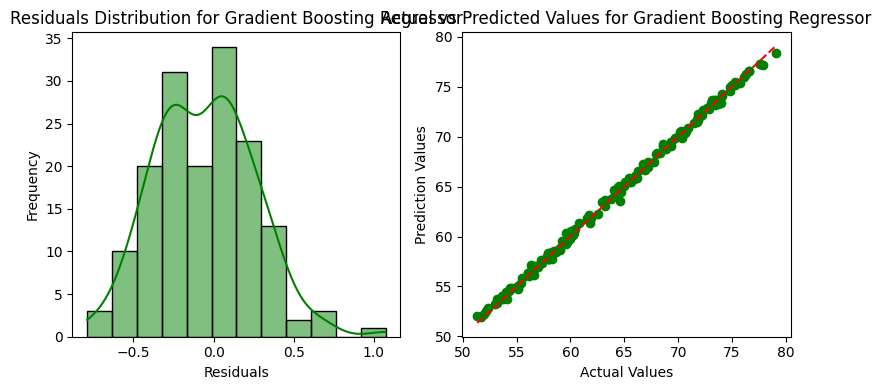

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Create and train the Gradient Boosting Regressor model
gb_model = GradientBoostingRegressor()
gb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_gb = gb_model.predict(X_test)

# Calculate evaluation metrics
mae_gb = mean_absolute_error(y_test, y_pred_gb)
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

# Print evaluation metrics
print(f'Gradient Boosting Regressor MAE: {mae_gb:.2f}')
print(f'Gradient Boosting Regressor MSE: {mse_gb:.2f}')
print(f'Gradient Boosting Regressor R²: {r2_gb:.2f}')

# Create the plots
plt.figure(figsize=(8, 4))

# Plot 2: Actual vs Predicted Values
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
plt.scatter(y_test, y_pred_gb, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title('Actual vs Predicted Values for Gradient Boosting Regressor')
plt.xlabel('Actual Values')
plt.ylabel('Prediction Values')


# Plot 1: Residuals Distribution
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
residuals_gb = y_test - y_pred_gb
sns.histplot(residuals_gb, kde=True, color='green')
plt.title('Residuals Distribution for Gradient Boosting Regressor')
plt.xlabel('Residuals')
plt.ylabel('Frequency')


plt.tight_layout()
plt.show()



Support Vector Regressor Model

Support Vector Regression MAE: 1.12
Support Vector Regression MSE: 1.99


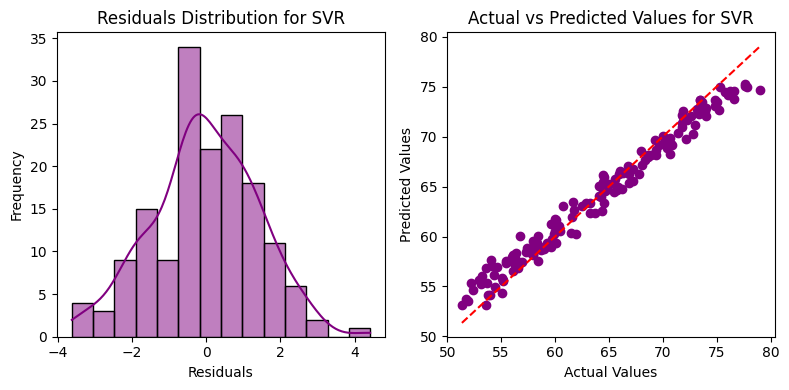

In [ ]:
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

# Create and train the Support Vector Regression model
svr_model = SVR(kernel='rbf')  # Using Radial Basis Function (RBF) kernel
svr_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_svr = svr_model.predict(X_test)

# Calculate evaluation metrics
mae_svr = mean_absolute_error(y_test, y_pred_svr)
mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)

# Print evaluation metrics
print(f'Support Vector Regression MAE: {mae_svr:.2f}')
print(f'Support Vector Regression MSE: {mse_svr:.2f}')

# Create the figure for side-by-side plots
plt.figure(figsize=(8, 4))

# Plot 1: Residuals Distribution
plt.subplot(1, 2, 1)
residuals_svr = y_test - y_pred_svr
sns.histplot(residuals_svr, kde=True, color='purple')
plt.title('Residuals Distribution for SVR')
plt.xlabel('Residuals')
plt.ylabel('Frequency')

# Plot 2: Actual vs Predicted Values
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_svr, color='purple')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Actual vs Predicted Values for SVR')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

# Adjust layout and show the plots
plt.tight_layout()
plt.show()


Decision Tree Regressor Model

Decision Tree MAE: 0.84
Decision Tree MSE: 1.10


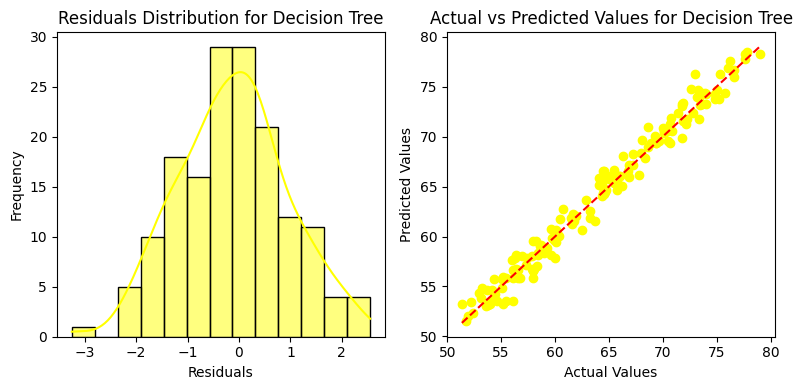

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Create and train the Decision Tree Regressor model
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)

# Make predictions
y_pred_dt = dt_model.predict(X_test)

# Evaluate the model
mae_dt = mean_absolute_error(y_test, y_pred_dt)
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print(f'Decision Tree MAE: {mae_dt:.2f}')
print(f'Decision Tree MSE: {mse_dt:.2f}')


# Create the figure for side-by-side plots
plt.figure(figsize=(8, 4))

# Plot 1: Residuals Distribution
plt.subplot(1, 2, 1)
residuals_dt = y_test - y_pred_dt
sns.histplot(residuals_dt, kde=True, color='yellow')
plt.title('Residuals Distribution for Decision Tree')
plt.xlabel('Residuals')
plt.ylabel('Frequency')

# Plot 2: Actual vs Predicted Values
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_dt, color='yellow')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Actual vs Predicted Values for Decision Tree')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

# Adjust layout and show the plots
plt.tight_layout()
plt.show()


Neural Network models

In [ ]:
pip install tensorflow


Simple ANN model

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 3964.2241 - val_loss: 521.4503
Epoch 2/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 256.0000 - val_loss: 132.9189
Epoch 3/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 102.2431 - val_loss: 50.9268
Epoch 4/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 36.0309 - val_loss: 11.1925
Epoch 5/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.2844 - val_loss: 1.2716
Epoch 6/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.2833 - val_loss: 0.8738
Epoch 7/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7549 - val_loss: 0.7338
Epoch 8/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6250 - val_loss: 0.6279
Epoch 9/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5220 - val_loss: 0.5718
Epoch 10/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4028 - val_loss: 0.4660
Epoch 11/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3458 - val_loss: 0.4072
Epoch 12/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3160 - val

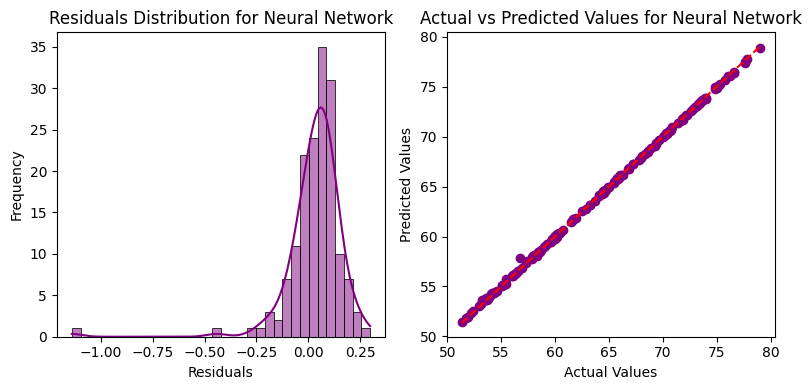

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Build a simple neural network model
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))  # Output layer for regression

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=10, validation_split=0.1, verbose=1)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Neural Network MAE: {mae:.2f}')
print(f'Neural Network MSE: {mse:.2f}')

# Create the figure for side-by-side plots
plt.figure(figsize=(8, 4))

# Plot 1: Residuals Distribution
plt.subplot(1, 2, 1)
residuals = y_test - y_pred.reshape(-1)
sns.histplot(residuals, kde=True, color='purple')
plt.title('Residuals Distribution for Neural Network')
plt.xlabel('Residuals')
plt.ylabel('Frequency')

# Plot 2: Actual vs Predicted Values
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred, color='purple')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Actual vs Predicted Values for Neural Network')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

# Adjust layout and show the plots
plt.tight_layout()
plt.show()



Adanced neural network model

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/500
16/16 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 3969.0752 - val_loss: 2079.6196
Epoch 2/500
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3656.5203 - val_loss: 1690.1238
Epoch 3/500
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3371.6997 - val_loss: 1403.6974
Epoch 4/500
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3101.1001 - val_loss: 1217.7560
Epoch 5/500
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2718.5542 - val_loss: 1010.3605
Epoch 6/500
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2467.4014 - val_loss: 753.9313
Epoch 7/500
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1927.8602 - val_loss: 526.6252
Epoch 8/500
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1547.8550 - val_loss: 386.9166
Epoch 9/500
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1119.9116 - val_loss: 371.9364
Epoch 10/500
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 819.5719 - val_loss: 290.6283
Epoch 11/500
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 477.0630 - val_loss: 218.8026
Epoc

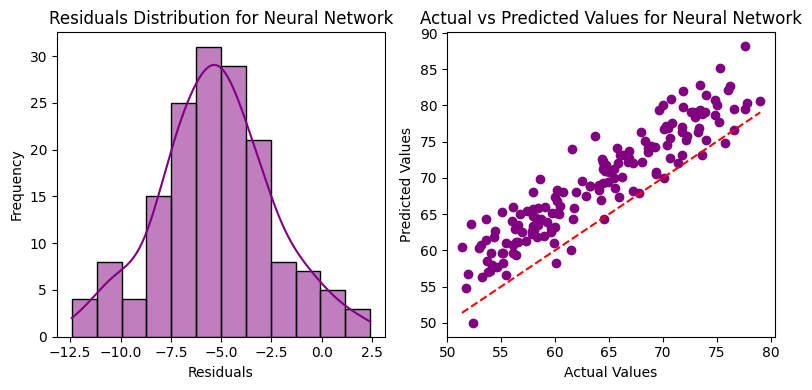

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Build a more advanced neural network model
model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))  # Output layer for regression

# Compile the model with a custom learning rate
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mean_squared_error')

# Add EarlyStopping to stop training when the validation loss is not improving
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(
    X_train, y_train,
    epochs=500,
    batch_size=32,
    validation_split=0.2,
    verbose=1,
    callbacks=[early_stopping]
)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Neural Network MAE: {mae:.2f}')
print(f'Neural Network MSE: {mse:.2f}')


# Create the figure for side-by-side plots
plt.figure(figsize=(8, 4))

# Plot 1: Residuals Distribution
plt.subplot(1, 2, 1)
residuals = y_test - y_pred.reshape(-1)
sns.histplot(residuals, kde=True, color='purple')
plt.title('Residuals Distribution for Neural Network')
plt.xlabel('Residuals')
plt.ylabel('Frequency')

# Plot 2: Actual vs Predicted Values
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred, color='purple')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Actual vs Predicted Values for Neural Network')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

# Adjust layout and show the plots
plt.tight_layout()
plt.show()





Tabnet Architecture

In [ ]:
pip install pytorch-tabnet


  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl.metadata (1.8 kB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinu

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 3599.6174| test_rmse: 57.41762|  0:00:00s
epoch 1  | loss: 2307.55207| test_rmse: 99.89291|  0:00:01s
epoch 2  | loss: 921.13881| test_rmse: 22.66419|  0:00:01s
epoch 3  | loss: 114.5146| test_rmse: 24.09803|  0:00:02s
epoch 4  | loss: 26.16185| test_rmse: 29.62128|  0:00:02s
epoch 5  | loss: 18.51037| test_rmse: 9.27905 |  0:00:02s
epoch 6  | loss: 12.69055| test_rmse: 8.78037 |  0:00:03s
epoch 7  | loss: 12.09636| test_rmse: 9.91886 |  0:00:03s
epoch 8  | loss: 9.52165 | test_rmse: 7.64625 |  0:00:04s
epoch 9  | loss: 8.7048  | test_rmse: 6.61467 |  0:00:04s
epoch 10 | loss: 8.74573 | test_rmse: 3.27594 |  0:00:05s
epoch 11 | loss: 6.67906 | test_rmse: 3.03658 |  0:00:05s
epoch 12 | loss: 6.23166 | test_rmse: 2.6076  |  0:00:05s
epoch 13 | loss: 6.64445 | test_rmse: 2.75936 |  0:00:06s
epoch 14 | loss: 6.45699 | test_rmse: 2.41907 |  0:00:06s
epoch 15 | loss: 4.92465 | test_rmse: 2.15413 |  0:00:07s
epoch 16 | loss: 6.64353 | test_rmse: 2.19617 |  0:00:07s
epoch 17 |

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


TabNet MAE: 0.79
TabNet MSE: 1.01


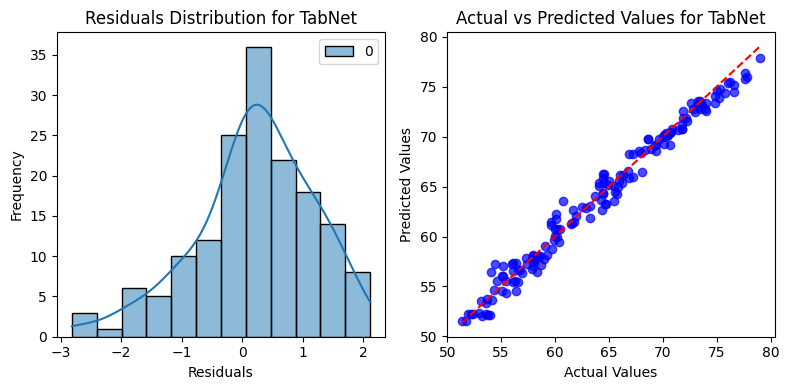

In [ ]:
import numpy as np
from pytorch_tabnet.tab_model import TabNetRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming X and y are your feature matrix and target vector
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert to NumPy arrays (TabNet requires numpy arrays)
X_train = X_train.values if isinstance(X_train, pd.DataFrame) else X_train
X_test = X_test.values if isinstance(X_test, pd.DataFrame) else X_test
y_train = y_train.values if isinstance(y_train, pd.Series) else y_train
y_test = y_test.values if isinstance(y_test, pd.Series) else y_test

# Reshape y_train and y_test to be 2D arrays
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

# Define and train the TabNet model
tabnet_model = TabNetRegressor()
tabnet_model.fit(
    X_train, y_train,
    eval_set=[(X_test, y_test)],
    eval_name=['test'],
    eval_metric=['rmse'],
    max_epochs=50,  # You can adjust the number of epochs as needed
    patience=10,  # Early stopping if the validation loss doesn't improve
    batch_size=32,  # Adjust batch size based on your hardware capabilities
    num_workers=0,
    drop_last=False
)

# Make predictions on the test set
y_pred_tabnet = tabnet_model.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred_tabnet)
mse = mean_squared_error(y_test, y_pred_tabnet)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_tabnet)

print(f'TabNet MAE: {mae:.2f}')
print(f'TabNet MSE: {mse:.2f}')

# Create the figure for side-by-side plots
plt.figure(figsize=(8, 4))

# Plot 1: Residuals Distribution
residuals = y_test - y_pred_tabnet.reshape(-1, 1)
plt.subplot(1, 2, 1)
sns.histplot(residuals, kde=True, color='blue')
plt.title('Residuals Distribution for TabNet')
plt.xlabel('Residuals')
plt.ylabel('Frequency')

# Plot 2: Actual vs Predicted Values
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_tabnet, alpha=0.7, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Actual vs Predicted Values for TabNet')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

# Adjust layout and show the plots
plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 3599.6174| test_rmse: 57.41762|  0:00:00s
epoch 1  | loss: 2307.55207| test_rmse: 99.89291|  0:00:01s
epoch 2  | loss: 921.13881| test_rmse: 22.66419|  0:00:02s
epoch 3  | loss: 114.5146| test_rmse: 24.09803|  0:00:03s
epoch 4  | loss: 26.16185| test_rmse: 29.62128|  0:00:03s
epoch 5  | loss: 18.51037| test_rmse: 9.27905 |  0:00:04s
epoch 6  | loss: 12.69055| test_rmse: 8.78037 |  0:00:05s
epoch 7  | loss: 12.09636| test_rmse: 9.91886 |  0:00:06s
epoch 8  | loss: 9.52165 | test_rmse: 7.64625 |  0:00:06s
epoch 9  | loss: 8.7048  | test_rmse: 6.61467 |  0:00:06s
epoch 10 | loss: 8.74573 | test_rmse: 3.27594 |  0:00:07s
epoch 11 | loss: 6.67906 | test_rmse: 3.03658 |  0:00:07s
epoch 12 | loss: 6.23166 | test_rmse: 2.6076  |  0:00:08s
epoch 13 | loss: 6.64445 | test_rmse: 2.75936 |  0:00:08s
epoch 14 | loss: 6.45699 | test_rmse: 2.41907 |  0:00:09s
epoch 15 | loss: 4.92465 | test_rmse: 2.15413 |  0:00:09s
epoch 16 | loss: 6.64353 | test_rmse: 2.19617 |  0:00:10s
epoch 17 |

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


TabNet MAE: 0.79
TabNet MSE: 1.01
TabNet RMSE: 1.00
TabNet R²: 0.98


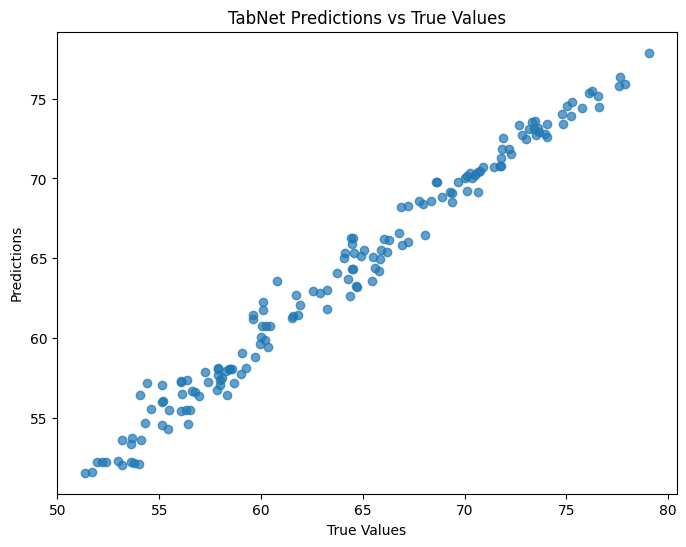

In [ ]:
import numpy as np
from pytorch_tabnet.tab_model import TabNetRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import torch

# Assuming X and y are your feature matrix and target vector
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert to NumPy arrays (TabNet requires numpy arrays)
X_train = X_train.values if isinstance(X_train, pd.DataFrame) else X_train
X_test = X_test.values if isinstance(X_test, pd.DataFrame) else X_test
y_train = y_train.values if isinstance(y_train, pd.Series) else y_train
y_test = y_test.values if isinstance(y_test, pd.Series) else y_test

# Reshape y_train and y_test to be 2D arrays
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

# Define and train the TabNet model
tabnet_model = TabNetRegressor()
tabnet_model.fit(
    X_train, y_train,
    eval_set=[(X_test, y_test)],
    eval_name=['test'],
    eval_metric=['rmse'],
    max_epochs=500,  # You can adjust the number of epochs as needed
    patience=10,  # Early stopping if the validation loss doesn't improve
    batch_size=32,  # Adjust batch size based on your hardware capabilities
     # Used for batch normalization
    num_workers=0,
    drop_last=False
)

# Make predictions on the test set
y_pred_tabnet = tabnet_model.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred_tabnet)
mse = mean_squared_error(y_test, y_pred_tabnet)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_tabnet)

print(f'TabNet MAE: {mae:.2f}')
print(f'TabNet MSE: {mse:.2f}')
print(f'TabNet RMSE: {rmse:.2f}')
print(f'TabNet R²: {r2:.2f}')

# Visualization (optional)
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_tabnet, alpha=0.7)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('TabNet Predictions vs True Values')
plt.show()


<ipython-input-7-1340f6748f24>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='MSE', y='Model', data=df, palette='Blues_d')
<ipython-input-7-1340f6748f24>:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='MAE', y='Model', data=df, palette='Greens_d')


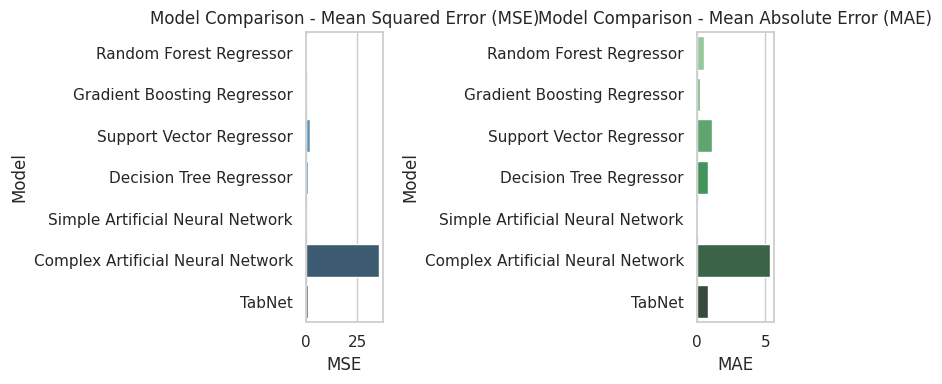

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define the data
data = {
    'Model': [
        'Random Forest Regressor',
        'Gradient Boosting Regressor',
        'Support Vector Regressor',
        'Decision Tree Regressor',
        'Simple Artificial Neural Network',
        'Complex Artificial Neural Network',
        'TabNet'
    ],
    'MSE': [0.37, 0.10, 1.99, 1.10, 0.02, 35.77, 1.01],
    'MAE': [0.49, 0.25, 1.12, 0.84, 0.09, 5.36, 0.79]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Set the plot style
sns.set(style="whitegrid")

# Create a figure and axis
plt.figure(figsize=(8, 4))

# Plot MSE
plt.subplot(1, 2, 1)
sns.barplot(x='MSE', y='Model', data=df, palette='Blues_d')
plt.title('Model Comparison - Mean Squared Error (MSE)')
plt.xlabel('MSE')
plt.ylabel('Model')

# Plot MAE
plt.subplot(1, 2, 2)
sns.barplot(x='MAE', y='Model', data=df, palette='Greens_d')
plt.title('Model Comparison - Mean Absolute Error (MAE)')
plt.xlabel('MAE')
plt.ylabel('Model')

# Adjust layout and show the plots
plt.tight_layout()
plt.show()


Explanatory Agent Designing

In [ ]:
pip install -qU langchain-openai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.0/52.0 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 391.5/391.5 kB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 362.9/362.9 kB 20.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 33.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.9/318.9 kB 17.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 148.9/148.9 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.9/141.9 kB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 4.0 MB/s eta 0:00:00
